<a href="https://colab.research.google.com/github/Jimmy-Rais/Machine-Learning/blob/main/Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Digits classification using fully connected/Dense Layers
We are going to Diagnosis the model and understand if it has high bias and/or high variance and suggest cures
author:jimmyrais63@gmail.com
"""
#Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
#Load the data and split it into training and test set
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


This is 5
X_train shape=(60000, 28, 28)
Y_train shape=(60000,)


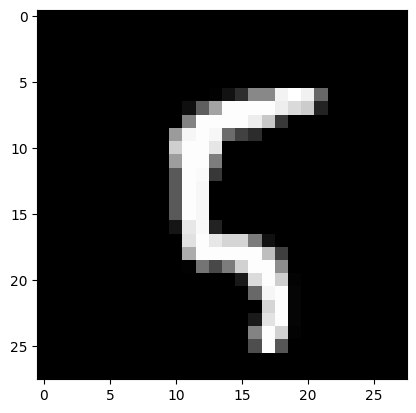

In [ ]:
#Visualize training data and verify the shapes
plt.imshow(x_train[100],cmap='gray')
print(f"This is {y_train[100]}")
print(f"X_train shape={x_train.shape}")
print(f"Y_train shape={y_train.shape}")


In [ ]:
#Model creation
#The input layer make sure that there won't be shape mismatch
model=Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #Dense(units=25,activation='relu'),
    #Dense(units=16,activation='relu'),
    #Dense(units=10,activation='linear'),
    #This gave 93% accuracy on the training set
    Dense(units=50,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(units=10,activation='linear'),
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.0385 - accuracy: 0.4554
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9619 - accuracy: 0.6725
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6009 - accuracy: 0.8005
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4005 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.9304
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2029 - accuracy: 0.9464
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1674 - accuracy: 0.9551
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1474 - accuracy: 0.9589
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1368 - accuracy: 0.9632
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.121

In [ ]:
#Understanding Bias and/or Variance of the model
#1.Let's create a validation set
import sklearn
from sklearn.model_selection import train_test_split
x_cv,x_t,y_cv,y_t=train_test_split(x_test,y_test,test_size=0.2)
print(f"Validation_set size={x_cv.shape}")
print(f"Test_set siwe={x_t.shape}")
#Evaluate Jtrain(Loss function on the training set)
J_train=model.evaluate(x_train,y_train)
#Evaluate Jcv(Loss Function on the dev set(Validation set))
J_cv=model.evaluate(x_cv,y_cv)

Validation_set size=(8000, 28, 28)
Test_set siwe=(2000, 28, 28)
250/250 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9594


1/1 [==============================] - 0s 88ms/step
We are trying to classify the below digit using a neural network model:
The result given by the neural network is 3


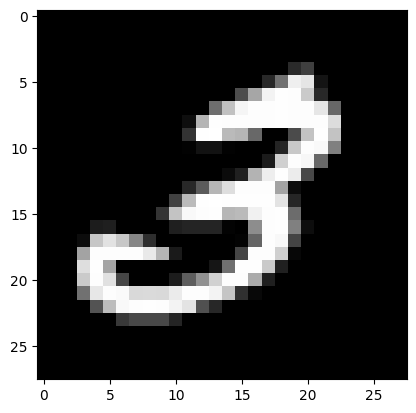

In [ ]:
''' The loss obtained on the validation set is slightly less than the one obtained on the training set,this implies that the model does not have
high variance,however the model seems to have high bias(obtained 92% accuracy withe the initial network)if I consider as performance baseline 96%
Cure for High Bias networks: 1.Increase the complexity of the network(more Number of layers or units per layer(initially we had
25 units in the first layer,16 in the second and 10 in the o/p layer,try to increase
 The second solution is to decrease the regularization factor and observe the result'''
#Predictions
import numpy as np
#Reshape the input image so that it will be compatible with the input layer of the neural network
predictions=model.predict(x_t[0].reshape(1,28,28))
#Covert numerical predictions into probabilities using the softmax activation,this approach helps to reduce numerical round off errors
pred=tf.nn.softmax(predictions)
print("We are trying to classify the below digit using a neural network model:")
plt.imshow(x_t[0],cmap='gray')
print(f"The result given by the neural network is {np.argmax(pred)}")

In [ ]:
# Saving the model with Tflite
import pathlib
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
tflite_model_file= pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

165088

In [ ]:
#Download the tflite
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>